In [1]:
#import necessary package

import numpy as np
import pandas as pd
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [9]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fuel_econ.csv')
data.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


# Formative Assignment: Advanced Linear Algebra (PCA)

<center>
    <img src="https://miro.medium.com/v2/resize:fit:300/1*mgncZaKaVx9U6OCQu_m8Bg.jpeg">
</center>

The goal of PCA is to extract information while reducing the number of features from a dataset by identifying which existing features relate to another. The crux of the algorithm is trying to determine the relationship between existing features, called principal components, and then quantifying how relevant these principal components are. The principal components are used to transform the high dimensional data to a lower dimensional data while preserving as much information. For a principal component to be relevant, it needs to capture information about the features. We can determine the relationships between features using covariance.

### Step 1: Load and Standardize the Data

![image.png](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQLxe5VYCBsaZddkkTZlCY24Yov4JJD4-ArTA&usqp=CAU)

Explain why we need to handle the data on the same scale.

 - Several advantages come with handling data that are on the same scale. A major advantage is that standardizing data or scaling them helps remove outliers that might cause models to perfom poorly. Also it is easy to compare two different features in terms of the effects they posses on the model when they are on the same scale. This can help drop unnecessary features or those with the least impact on our model.

In [10]:
# Creating a sub-dataframe that contains the data we going to use
mask1 = data["displ"]
mask2 = data["feScore"]
mask3 = data["co2"]

working_data = pd.concat([mask1, mask2, mask3], axis=1)

# Stardizing data using
mean = working_data.mean()
std = np.std(working_data, axis=0, ddof=1)
standardized_data = (working_data - mean) / std
print(standardized_data)

         displ   feScore       co2
0     0.650453 -0.950459  1.022708
1    -0.727906  0.188584 -0.298512
2     0.497302 -0.380937  0.567862
3     0.497302 -0.380937  0.751966
4    -0.421604  1.327627 -0.720869
...        ...       ...       ...
3924 -0.881057  2.466670 -3.233353
3925 -0.727906  1.897148 -1.728029
3926 -0.727906  1.897148 -1.782177
3927  0.344151 -0.380937  0.113016
3928  0.344151 -0.950459  0.437906

[3929 rows x 3 columns]


![cov matrix.webp](https://dmitry.ai/uploads/default/original/1X/9bd2851674ebb55e404cc3ff5e2ffe65b42ff460.png)

We use the pair - wise covariance of the different features to determine how they relate to each other. With these covariances, our goal is to group / cluster based on similar patterns. Intuitively, we can relate features if they have similar covariances with other features.

### Step 2: Calculate the Covariance Matrix
The covariance matrix helps us understand how the features are related to each other. It is a key component in PCA.

In [11]:
# Step 2: Calculate the Covariance Matrix
cov_matrix = np.cov(standardized_data, rowvar=False)
print(cov_matrix)

[[ 1.         -0.79343231  0.85537478]
 [-0.79343231  1.         -0.94062422]
 [ 0.85537478 -0.94062422  1.        ]]


### Step 3: Perform Eigendecomposition
Eigendecomposition of the covariance matrix will give us the eigenvalues and eigenvectors, which are essential for PCA.
Fill in the code to compute the eigenvalues and eigenvectors of the covariance matrix.

In [12]:
# Step 3: Perform Eigendecomposition
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
print("Eign Values: ", eigenvalues)
print("Eign Vectors:\n ",eigenvectors)

Eign Values:  [0.05102134 0.22127172 2.72770694]
Eign Vectors:
  [[-0.18612354  0.80765921 -0.55950392]
 [ 0.6087865   0.5417683   0.57953957]
 [ 0.77119195 -0.23275248 -0.59252786]]


### Step 4: Sort Principal Components
Sort the eigenvectors based on their corresponding eigenvalues in descending order. The higher the eigenvalue, the more important the eigenvector.
Complete the code to sort the eigenvectors and print the sorted components.

In [13]:
# Step 4: Sort Principal Components
order_of_importance = np.argsort(eigenvalues)[::-1]
print ( 'the order of importance is :\n {}'.format(order_of_importance))

# utilize the sort order to sort eigenvalues and eigenvectors
sorted_eigenvalues = eigenvalues[order_of_importance]

print('\n\n sorted eigen values:\n{}'.format(sorted_eigenvalues))
sorted_eigenvectors = eigenvectors[:, order_of_importance]
print('\n\n The sorted eigen vector matrix is: \n {}'.format(sorted_eigenvectors))

the order of importance is :
 [2 1 0]


 sorted eigen values:
[2.72770694 0.22127172 0.05102134]


 The sorted eigen vector matrix is: 
 [[-0.55950392  0.80765921 -0.18612354]
 [ 0.57953957  0.5417683   0.6087865 ]
 [-0.59252786 -0.23275248  0.77119195]]


### Step 5: Project Data onto Principal Components
Now that we’ve selected the number of components, we will project the original data onto the chosen principal components.
Fill in the code to perform the projection.

In [14]:
# Step 5: Project Data onto Principal Components
# Decide on the number of principal components to keep (choose manually or based on explained variance)
num_components = 2  # Example: Keep the top 2 principal components

# Select the top `num_components` eigenvectors (columns)
top_eigenvectors = sorted_eigenvectors[:, :num_components]

# Project the standardized data onto the selected principal components
reduced_data = np.dot(standardized_data, top_eigenvectors)

# Display the first few rows of projected data
print("Reduced Data (Projected onto Principal Components):\n", reduced_data[:5])

Reduced Data (Projected onto Principal Components):
 [[-1.52074247 -0.22762168]
 [ 0.69343475 -0.41625139]
 [-0.83548464  0.06309974]
 [-0.94457165  0.02024897]
 [ 1.43243637  0.54653816]]


### Step 6: Output the Reduced Data
Finally, display the reduced data obtained by projecting the original dataset onto the selected principal components.

In [15]:
# Step 6: Output the Reduced Data
print(f"Reduced Data Shape: {reduced_data.shape}")  # Display the shape of the reduced dataset

# Display the first 5 rows of the reduced data
print("\nFirst 5 Rows of Reduced Data:\n", reduced_data[:5])


Reduced Data Shape: (3929, 2)

First 5 Rows of Reduced Data:
 [[-1.52074247 -0.22762168]
 [ 0.69343475 -0.41625139]
 [-0.83548464  0.06309974]
 [-0.94457165  0.02024897]
 [ 1.43243637  0.54653816]]


### Step 7: Visualize Before and After PCA
Now, let's plot the original data and the data after PCA to compare the reduction in dimensions visually.

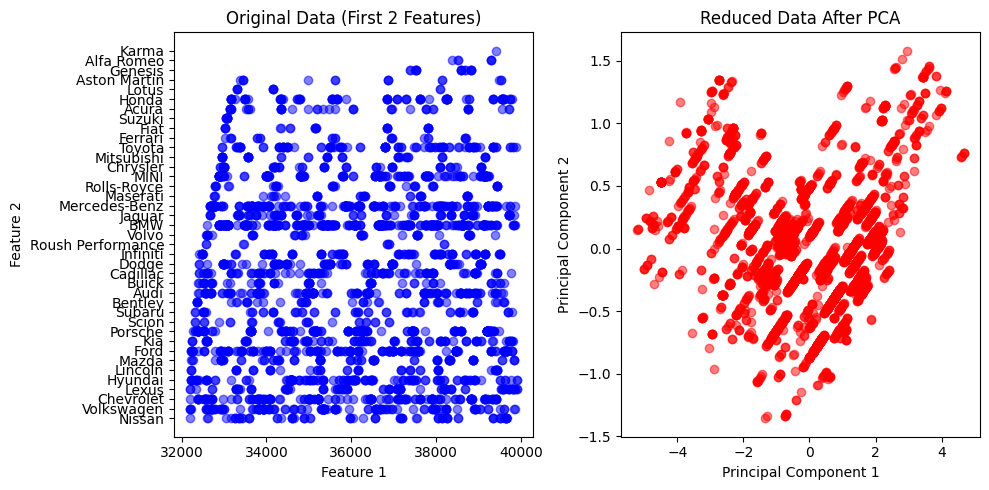

In [16]:
# Step 7: Visualize Before and After PCA

import matplotlib.pyplot as plt

# Convert data to NumPy array if it's a Pandas DataFrame
if isinstance(data, pd.DataFrame):
    data_np = data.to_numpy()
else:
    data_np = data

# Convert reduced_data to NumPy array if needed
if isinstance(reduced_data, pd.DataFrame):
    reduced_data_np = reduced_data.to_numpy()
else:
    reduced_data_np = reduced_data

# Plot original data (first two features for simplicity)
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(data_np[:, 0], data_np[:, 1], alpha=0.5, color='blue')
plt.title("Original Data (First 2 Features)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Plot reduced data after PCA
plt.subplot(1, 2, 2)
plt.scatter(reduced_data_np[:, 0], reduced_data_np[:, 1], alpha=0.5, color='red')
plt.title("Reduced Data After PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.tight_layout()
plt.show()
